# Livrable 2: 

<br>

**Group 4 : Anthony EBERHARD, Osman CEKIC, Johann CORNELIUS, Arthur LAMBERT, Oscar PALISSOT**

<br>

## Reminder of the context:

ADEME (Agency for the Environment and Energy Management) recently launched a call for expressions of interest to promote the creation of demonstrators and experiments of new mobility solutions for people and goods adapted to different types of territories. 

You are part of the team set up by CesiCDP to respond to the ADEME call. The challenge is to obtain new markets with very interesting financing to continue to develop your activity.

CesiCDP has decided to focus its study on the management of delivery routes. The algorithmic problem consists in calculating on a road network a route allowing to link a subset of cities, then to return to its starting point, so as to minimize the total duration of the route. This optimization will have to take into account the expected traffic on each axis for the different time slots.

The idea is to propose a method from Operations Research to generate a delivery round corresponding to this problem.

The scope has yet to be defined. You have described a basic version of the problem. But, in order to make it more realistic and get ADEME's full attention, you hesitate to add additional constraints. It is to be expected that this will make it harder to deal with.
<br>

## Problem definition:

CesiCDP is a company specialized in solution optimization. We are currently working on a path optimization problem, more commonly known as the Travelling salesman problem. For this purpose, we have at our disposal a fleet of delivery trucks whose mission is to deliver all the parcels and to return to its starting point with the shortest possible travel time. The starting point of our problem is the warehouse containing all the packages to be delivered.
<br>


## Problem modeling:

To model our problem we have chosen to use a directed graph. The vertices of the graph represent the delivery points and the edges, the possible routes between each delivery point. The weights of the edges represent the travel time between each delivery point. The graph will obviously be connected.
<br>

Example of a weighted graph:

<br>

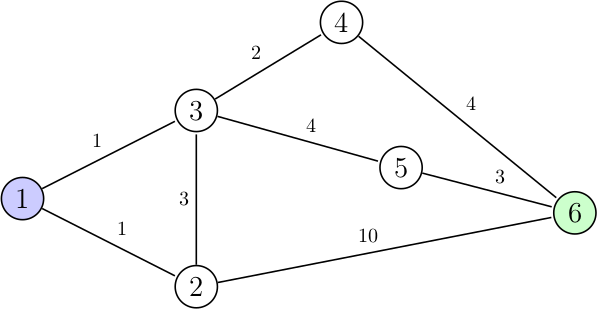

<br>

In order to store and manipulate the graph in our algorithm, we will use an adjacency matrix. The adjacency matrix allows to represent the neighboring vertices of the graph as well as their weighting.
<br>

Example of an adjacency matrix of a weighted graph :

<br>

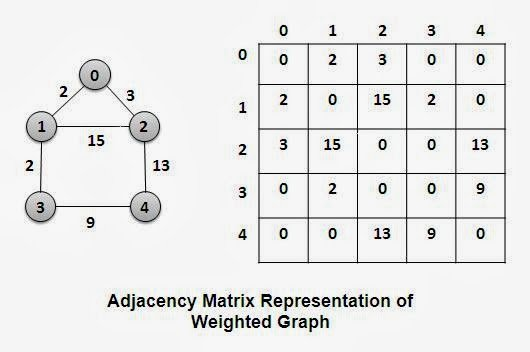

<br>

## Problem complexity:

Our problem is similar to the Hamiltonian chain problem with some additional constraints. A Hamiltonian chain is a chain that passes once and only once through each vertex of an undirected graph. 
The Hamiltonian chain problem is part of the set $np$ . That is, there is no known polynomial solution to it.

<br>

We can even go further by saying that the Hamiltonian chain problem belongs to the set $np-complete$. **_cf exercise basket of prosit 2_**.
<br>

This means:

<ul>
    <li>it is possible to verify a solution in polynomial time; the verification belongs to the set $p$.</li>
    <li>all problems of class $np$ reduce to this one via a polynomial reduction; this means that the problem is at least as hard as all other problems of class $np$.</li>
</ul>

Now, as said before, our delivery problem is similar to a Hamiltonian chain problem while adding additional constraints.

For the complexity of our problem we have :
$$O()_{hamiltonian chain} < O()_{delivery} $$

We can therefore state that our problem belongs to the set $np-complete$ and that there is no solution in polynomial time.

## Variable definitions:


- $n$ the number of cities
- $N$ is the set of cities, with $N=\{1,2,...,n\}$
- $p$ the number of vehicles
- $v$ is a special vehicle
- $V$ is the set of vehicles, with $N=\{1,2,...,p\}$
- $R$ is the set of roads, with $R\{(i,j)\in N^2 : i\neq j\}$
- $c_{ij}$ is the cost of the journey using the road $(i,j)\in R$
- $Q$ is the capacity of the vehicle
- $q$ is the volume of packages to be delivered to the city $i\in N$


<br>

The binary variable takes the value $1$ if the arete that connects the vertex $i$ and $j$ if the arete is part of the optimal route and is used by the vehicle $k$.

$$x_{ijk} \in \left\{ 0,1 \right\} \; \forall k \in \left\{ 1,...,p \right\},\: i,j \in \left\{ 1,...,n \right\}$$
<br>

We note that a vehicle cannot make a trip from one vertex to the same vertex.

<br>

$$x_{ijk} \in 0 \; \forall k \in \left\{ 1,...,p \right\},\: i,j \in \left\{ 1,...,n \right\}$$

<br>

## Objective function : 

<br>

The objective function minimizes the cost of the routes in the tour. The cost is not expressed here in a particular unit. It is calculated from the weights of the weighted graph representing our cities. The cost can be interpreted as the distance in km, the travel time in minutes, the fuel cost in euro... In all cases, the lower the cost, the more optimal the tour.
$$Min \sum_{v=1}^{p} \sum_{i=0}^{n} \sum_{j=0,\; i\neq j}^{n} c_{ij}x_{ijv}$$

<br>

##  Constraints: 

Several constraints emerge from this problem.

<br>
<ul>
    <li>The trucks have a starting point: the warehouse.</li>
    <br>
    $$ \sum_{j=2}^{n} x_{ijv} = 1 \;\;\; \forall v \in \{1,...,p\}$$
    <br>
    <li>A city cannot be visited by 2 vehicles in the same tour.</li>
    <br>
    $$ \sum_{v=1}^{p} \sum_{i=1}^{n} x_{ijk} = 1 \;\;\; \forall j \in \{2,...,n\}$$
    <br>
    <li>The vehicles leave the city in which they arrived. After their tour, the trucks must return to the warehouse.</li>
    <br>
    $$ \sum_{i=1}^{n} x_{ijv} = \sum_{i=1}^{n} x_{jiv} \;\;\; \forall j \in \{1,...,n\}, \; v \in \{1,...,p\}$$
</ul>
<br>
<br>
We also have to select a constraint to add to our study perimeter in order to bring a serious answer to the ADEME call for tender.
Selected constraint :
<br>
<br>
<ul>
    <li>The vehicles have a maximum capacity.</li>
    <br>
    $$ \sum_{i = 1}^{n}\sum_{j = 2}^{n} q_{j}x_{ijv}\;\;\; \forall v \in \{1,...,p\}$$
</ul>

<br>



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from collections import deque
import time
from functools import lru_cache

## Explication métaheuristique choisie
<br>
Algorithme génétique :

L'algorithme génétique est un algorithme basé de la théorie de Darwin sur l'évolution d'espèce. 
Cet algorithme est un des plus pertinents car il est basé sur la population de plus il est approprié car il fournit une solution d'optimisation de très grande qualité dans un temps raisonnable, cependant il est très difficile à mettre en place. 

L'algorithme génétique a besoin de moins d'informations par rapport au problème rencontré mais demande une modélisation mathématique très rigoureuse.

Cet algorithme est très adapté pour résoudre le problème du voyageur de commerce car c'est une stratégie d'évolution. Les stratégies d'évolution forment une famille de métaheuristiques d'optimisation. Elles sont inspirées de la théorie de l'évolution, et appartiennent à ce titre à la classe des algorithmes évolutionnaires.

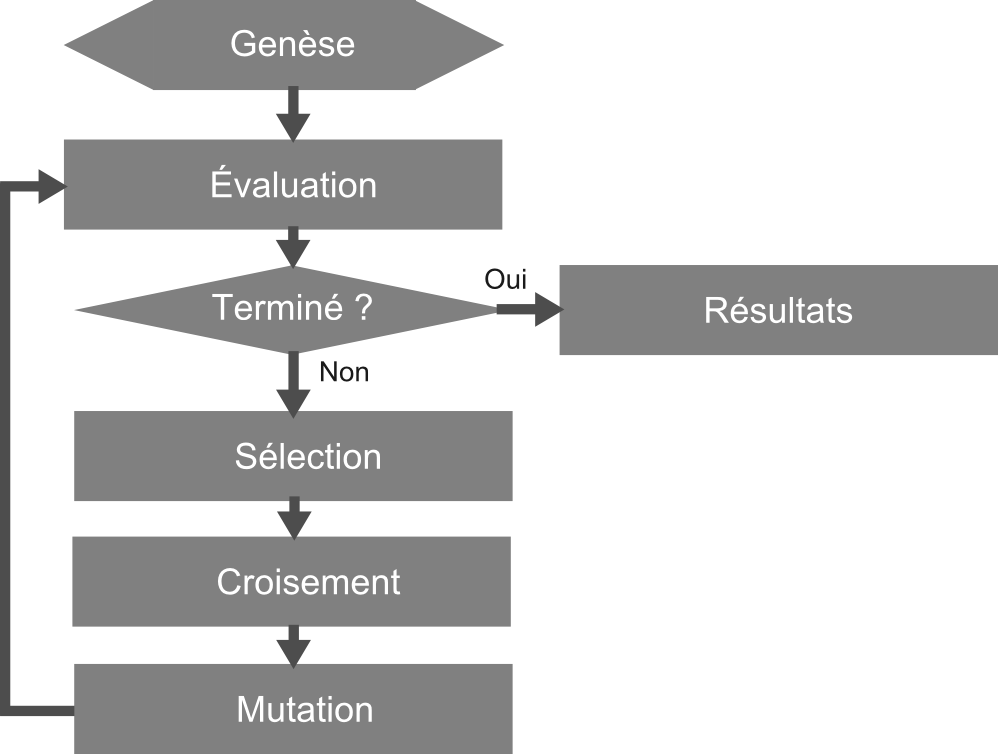

Cet algorithme se compose de 4 étapes :

    - Etape 1 : génération d'une population aléatoire, une population est un ensemble de solutions aléatoires au problème.
    - Etape 2 : durant cette étape chaque individu de la population va être évalué pour déterminer si une solution est utilisable.
    - Etape 3 : lors de cette étape, on crée parmi tous les individus des couples d'individus.
    - Etape 4 : dans cette dernière étape, on croise les deux individus de chaque couple ce qui nous donnes deux solutions files, ces solutions forme une nouvelle population.
    
    L'algorithme va ensuite tourner en recommençant à l'étape 2 et ainsi de suite jusqu'à trouver une solution optimale.
    
    
Sources d'articles : 

    - https://electricalvoice.com/genetic-algorithm-advantages-disadvantages/
    - https://web.wpi.edu/Pubs/ETD/Available/etd-050306-211907/unrestricted/yzhou.pdf

## Génération des élements : 
<br>
Before actually starting to solve the problem, it is necessary to generate the elements of our study. In our case, cities and roads respectively represented by points in a landmark and segments linking cities connected by a road.

In [2]:
#le nombre de villes
n = 100


# utiliser un seed explicitement permettra de reproduire les conditions initiales
# et de comparer le comportement de différents algorithmes sur une même instance
random.seed(a=5)

## City generation :    

We start by generating the cities. The **__generateVille__** function returns a tuple containing the coordinates of the generated cities. It takes as a parameter the number of cities we want to generate.

In [3]:
def generateVille(n):
    x = [random.uniform(0, 100) for n in range(n)]
    y = [random.uniform(0, 100) for n in range(n)]
    x[0] = 50
    y[0] = 50
    N = (x, y)
    return N

## Route generation  :
Next we generate the routes. The **__generateRoutes__** function returns a two-dimensional array representing the adjacency matrix. It takes the number of cities and the generated cities as parameters.


In [4]:
def generateRoute(n, villes):
    matrice = []
    for i in range(n):
        d = [None]*n
        for j in range(n):
            dx = villes[0][j] - villes[0][i]
            dy = villes[1][j] - villes[1][i]
            d[j] = math.sqrt(dx * dx + dy * dy)
        matrice.append(d)
    return matrice


## Map generation : : 
<br>
This function is purely optional. It is used to generate a map representing the generated elements. It takes the generated cities and roads as parameters.

In [5]:
villes = generateVille(n)

routes = generateRoute(n, villes)


In [6]:
def generateMap(villes, routes):
    plt.scatter(villes[0], villes[1],s=400)
    plt.gcf().set_size_inches(18, 10)
    plt.show()

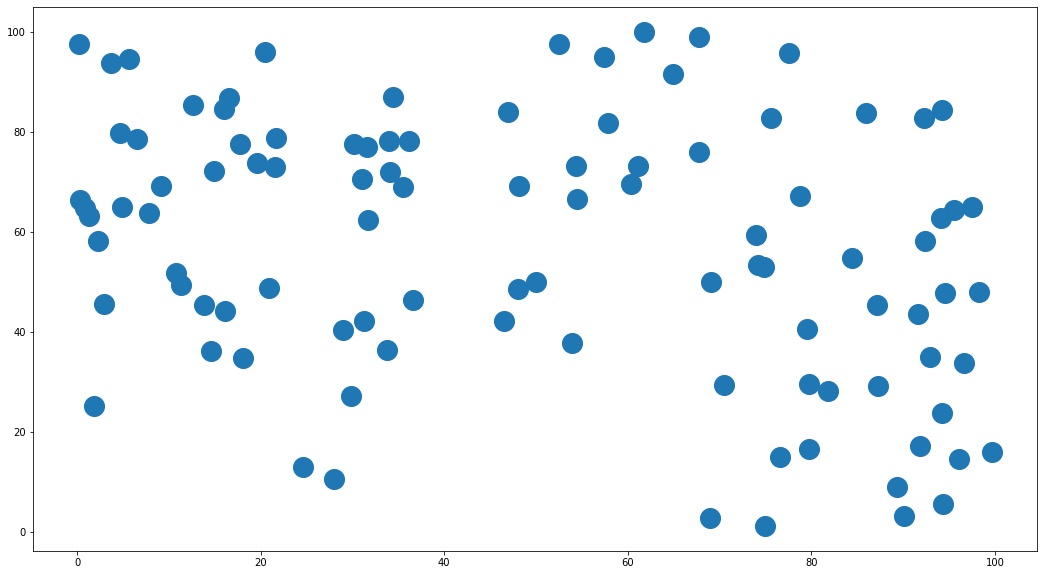

In [7]:
generateMap(villes, routes)

## First approach: hill-climbing
<br>
This heuristic algorithm allows a first approximation of the result.

### Random solution :
I start by generating a random solution to the problem. It is not the most optimal, but it is a starting point, it is valid in the case of a local optimum. This function, allows the calculation of the distance of the tour.

In [8]:
def distanceTournee(tournee):
    distance = []
    for i in range(len(tournee)):
        if (i < len(tournee)):
            distance.append(routes[tournee[i-1]][tournee[i]])
        else:
            distance.append(routes[tournee[i]][tournee[i+1]])
    return sum(distance)

Here we generate a random solution of cities.

In [9]:
def randomSolution():
    listeVille = [i for i in range(len(villes[0]))]
    firstTournee = random.sample(listeVille[1:], n-1)
    firstTournee.insert(0, 0)
    firstTournee.append(0)
    return firstTournee

firstTournee = randomSolution()
print(firstTournee)
print(distanceTournee(firstTournee))


[0, 29, 98, 88, 24, 81, 92, 6, 61, 99, 22, 7, 18, 15, 41, 96, 62, 25, 71, 5, 54, 60, 45, 49, 10, 27, 31, 48, 1, 78, 52, 36, 53, 87, 73, 95, 39, 89, 19, 35, 33, 90, 38, 84, 23, 68, 9, 75, 55, 37, 42, 94, 85, 30, 76, 11, 64, 83, 51, 74, 13, 80, 93, 56, 72, 43, 63, 21, 46, 82, 79, 91, 57, 40, 14, 26, 8, 16, 32, 50, 70, 20, 58, 44, 59, 66, 65, 34, 69, 97, 77, 67, 47, 2, 4, 12, 17, 3, 28, 86, 0]
5593.315932214655


Then, we generate a graph allowing the visualisation of the previously calculated solution.

In [10]:
def printTournee(villes, tournee):
    plt.scatter(villes[0], villes[1],s=400)
    for i in range(len(tournee)-1) :
        plt.plot([villes[0][tournee[i]],villes[0][tournee[i+1]]], [villes[1][tournee[i]], villes[1][tournee[i+1]]], c='red')
    plt.gcf().set_size_inches(18, 10)
    plt.show()

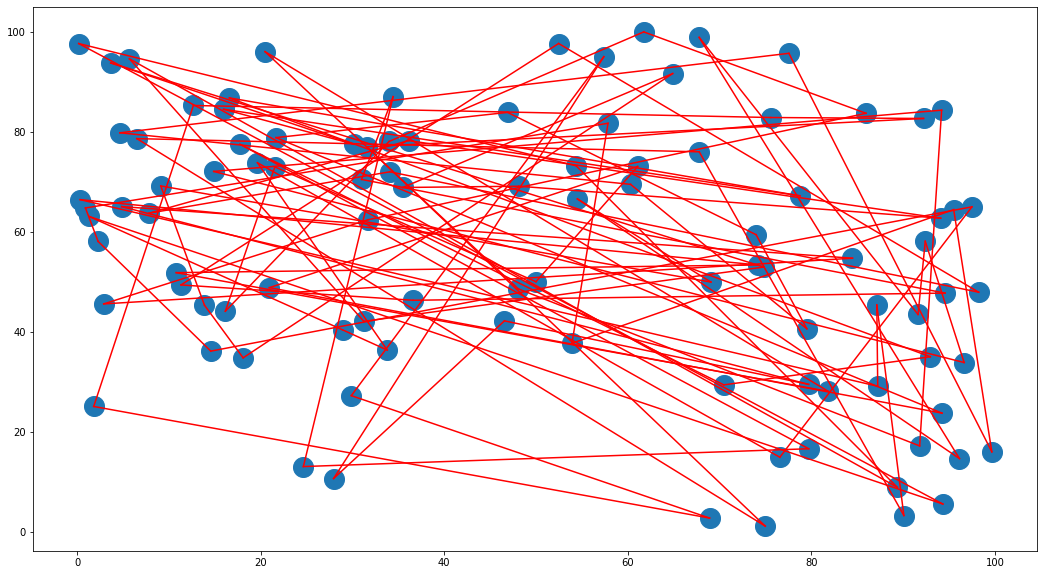

In [11]:
printTournee(villes, firstTournee)

Furthermore, in this function we calculate the neighbouring solutions to the previously calculated solutions. For this purpose, we take the local solution calculated above.

In [12]:
def voisinage(tournee):
    for k in range(1, len(tournee)-2):
        voisin = tournee.copy()
        i = voisin[k]
        voisin[k] = voisin[k+1]
        voisin[k+1] = i
        yield(voisin)

Then we use the hill-climbing algorithm to identify the neighbours that have a more optimal solution. This is repeated until a minimum is found.

In [13]:
def hill_climbing(solution_initiale):

    solution_courante = solution_initiale
    nouveau = True
    nb_iter = 0
    
    while (nouveau):
        nb_iter += 1
        meilleure_solution = solution_courante
        cout_meillieur = distanceTournee(meilleure_solution)
        # on parcourt tous les voisins de la solution courante pour garder la meilleure
        for voisin in voisinage(solution_courante):
            cout_voisin = distanceTournee(voisin)
            if cout_voisin < cout_meillieur:
                cout_meillieur = cout_voisin
                meilleure_solution = voisin
        nouveau = (meilleure_solution != solution_courante)
        solution_courante = meilleure_solution
    print("Nombre d'itération : %d" %nb_iter)
    
    return solution_courante

Here, once again, we generate a graph of the best calculated solution. However, this solution is not necessarily the best one because we may be in a local minimum.

optimisation locale
Nombre d'itération : 53
[0, 98, 29, 88, 24, 81, 92, 99, 6, 22, 61, 15, 7, 96, 18, 41, 62, 25, 71, 5, 60, 45, 54, 49, 27, 31, 10, 1, 78, 48, 36, 53, 87, 52, 95, 73, 89, 39, 33, 19, 38, 90, 35, 84, 23, 68, 75, 9, 37, 55, 42, 85, 94, 76, 30, 11, 64, 83, 51, 74, 93, 13, 56, 80, 72, 63, 21, 43, 57, 82, 46, 91, 40, 79, 14, 26, 16, 32, 50, 70, 58, 8, 20, 44, 59, 66, 65, 34, 97, 69, 77, 67, 47, 4, 2, 12, 17, 28, 86, 3, 0]
Coût : 3980.8738132423455


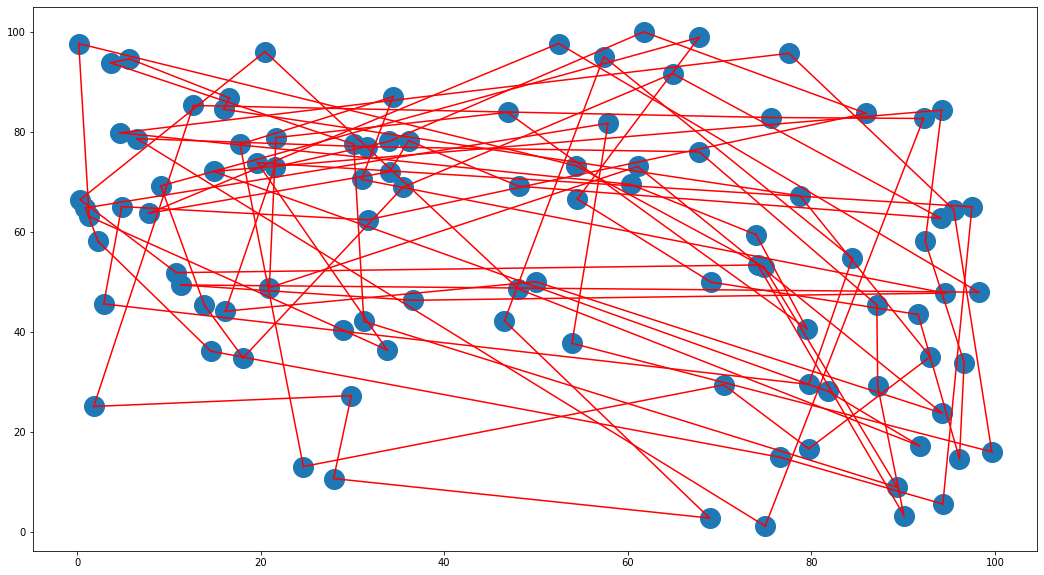

In [14]:
print("optimisation locale")
solutionLocale = hill_climbing(firstTournee)
print(solutionLocale)
print('Coût : '+ str(distanceTournee(solutionLocale)))
printTournee(villes, solutionLocale)

### Multi-start hill-climbing

Here we generate a defined number of random solutions, then perform the hill-climbing algorithm for each and keep the most optimal solution among the generated solutions.

Nombre d'itération : 43
Nombre d'itération : 51
Nombre d'itération : 51
Nombre d'itération : 43
Nombre d'itération : 47
Nombre d'itération : 35
Nombre d'itération : 39
Nombre d'itération : 49
Nombre d'itération : 42
Nombre d'itération : 37
calculé en  1.03125 s

Tournée finale =
[0, 92, 10, 31, 5, 12, 86, 89, 39, 78, 45, 79, 27, 72, 62, 95, 67, 16, 44, 98, 70, 51, 55, 49, 1, 50, 23, 68, 87, 42, 76, 71, 14, 48, 28, 32, 13, 19, 52, 20, 18, 61, 40, 96, 11, 57, 88, 80, 41, 84, 15, 69, 37, 47, 91, 99, 54, 35, 53, 75, 82, 59, 64, 34, 81, 83, 60, 6, 94, 29, 43, 66, 56, 73, 77, 85, 63, 4, 97, 33, 22, 38, 7, 46, 93, 21, 74, 2, 8, 30, 58, 65, 26, 25, 17, 9, 3, 90, 24, 36, 0]


Distance=3751


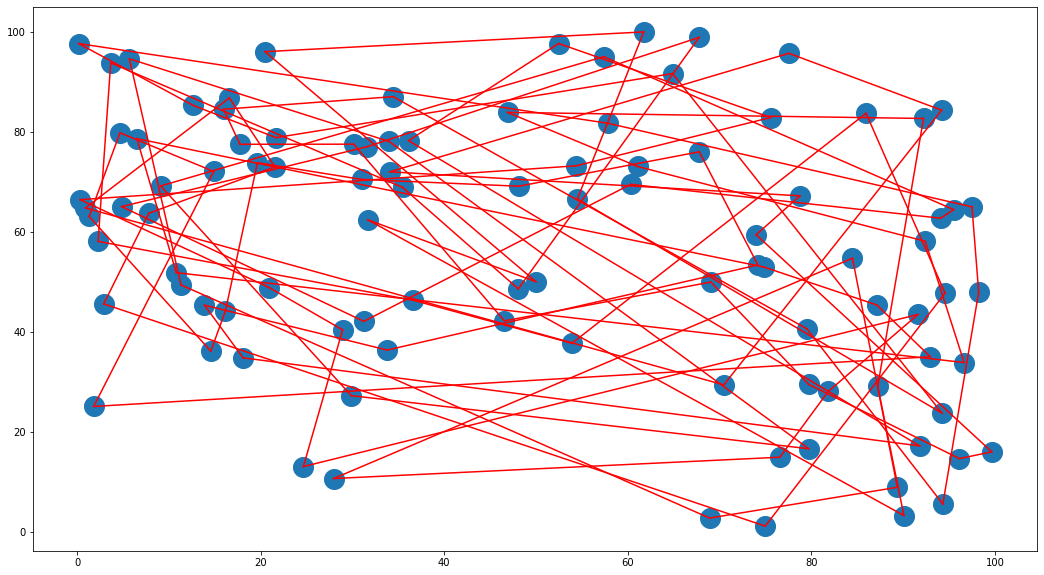

In [15]:
nb_iterations = 10

start = time.process_time()
val_min = 0
for i in routes:
    val_min += sum(i)
for _ in range(nb_iterations):
    tournee = randomSolution()
    sol_courante = hill_climbing(tournee)
    val_courante = distanceTournee(sol_courante)
    if (val_courante < val_min):
        val_min = val_courante
        sol_min = sol_courante
stop = time.process_time()
print("calculé en ", stop-start, 's')
print("\nTournée finale =" )
print(sol_min)
print('\n')
print("Distance=%d"% val_min)
printTournee(villes, sol_min)

## Approche méta-heuristique

### Taboo lists

In [16]:
def recherche_tabou_graph(solution_initiale, taille_tabou, iter_max):
        
    nb_iter = 0
    liste_tabou = deque((), maxlen = taille_tabou)

    # variables solutions pour la recherche du voisin optimal non tabou
    solution_courante = solution_initiale
    meilleure = solution_initiale
    meilleure_globale = solution_initiale

    # variables valeurs  pour la recherche du voisin optimal non tabou
    valeur_meilleure = distanceTournee(solution_initiale)
    valeur_meilleure_globale = valeur_meilleure

    # variables pour l'affichage
    meilleure_trouvee = distanceTournee(solution_courante)
    meilleure_globale_trouvee = meilleure_trouvee
    
    # liste des solutions courantes et des meilleures trouvées, pour afficher la trajectoire
    # l'élément à la ième position correspond à l'itération i
    courantes = deque(())
    meilleures_courantes = deque(())
    
    while (nb_iter < iter_max):
        
        valeur_meilleure = distanceTournee(solution_courante)
        
        # on parcourt tous les voisins de la solution courante
        for voisin in voisinage(solution_courante):
            valeur_voisin = distanceTournee(voisin)
            
            # meilleure solution non taboue trouvée
            if valeur_voisin < valeur_meilleure and (voisin not in liste_tabou):
    
                meilleure_trouvee += 1
                valeur_meilleure = valeur_voisin
                meilleure = voisin
        
        # on met à jour la meilleure solution rencontrée depuis le début
        if valeur_meilleure < valeur_meilleure_globale:
            meilleure_globale_trouvee += 1
            meilleure_globale = meilleure
            valeur_meilleure_globale = valeur_meilleure
        
        if valeur_meilleure < valeur_meilleure_globale:
            meilleure_globale = meilleure
            valeur_meilleure_globale = valeur_meilleure
            nb_iter = 0
        else:
            nb_iter += 1
            
        meilleures_courantes.append(valeur_meilleure_globale)
        courantes.append(valeur_meilleure)
        
        
        # on passe au meilleur voisin non tabou trouvé
        solution_courante = meilleure
        
        # on met à jour la liste tabou
        liste_tabou.append(solution_courante)

    return meilleure_globale, courantes, meilleures_courantes
    

valeur finale = 3724.7217598642956
calculé en  0.234375 s


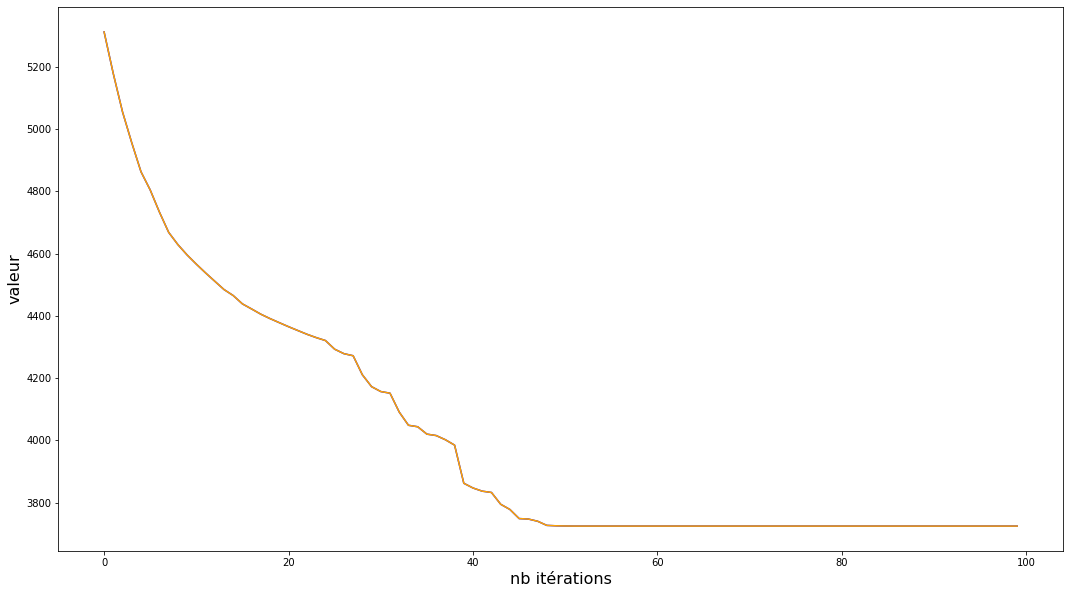

In [17]:
iter_max = 100
taille_tabou = 100

start = time.process_time()
tournee = randomSolution()
sol, courants, meilleurs_courants=recherche_tabou_graph(tournee, taille_tabou, iter_max)

plt.xlabel("nb itérations", fontsize=16)
plt.ylabel("valeur", fontsize=16)
res = plt.plot(range(iter_max), courants, c='blue')
res = plt.plot(range(iter_max), meilleurs_courants, c='orange')
plt.gcf().set_size_inches(18, 10)
print("valeur finale = " + str(distanceTournee(sol)))
stop = time.process_time()
print("calculé en ", stop-start, 's')

### tabou multi-start

calculé en  21.328125 s

Tournée finale =
[0, 97, 33, 78, 66, 84, 82, 57, 52, 58, 73, 75, 67, 44, 31, 90, 55, 47, 30, 39, 3, 87, 53, 59, 99, 25, 42, 20, 8, 4, 89, 83, 60, 34, 68, 6, 94, 96, 79, 61, 76, 28, 62, 10, 81, 71, 46, 13, 40, 37, 85, 93, 11, 41, 32, 64, 26, 88, 12, 24, 14, 17, 95, 29, 92, 86, 63, 35, 15, 48, 45, 21, 2, 27, 19, 69, 70, 65, 49, 38, 22, 50, 98, 77, 72, 56, 18, 23, 36, 51, 1, 80, 16, 43, 54, 5, 9, 74, 91, 7, 0]


Distance=3592


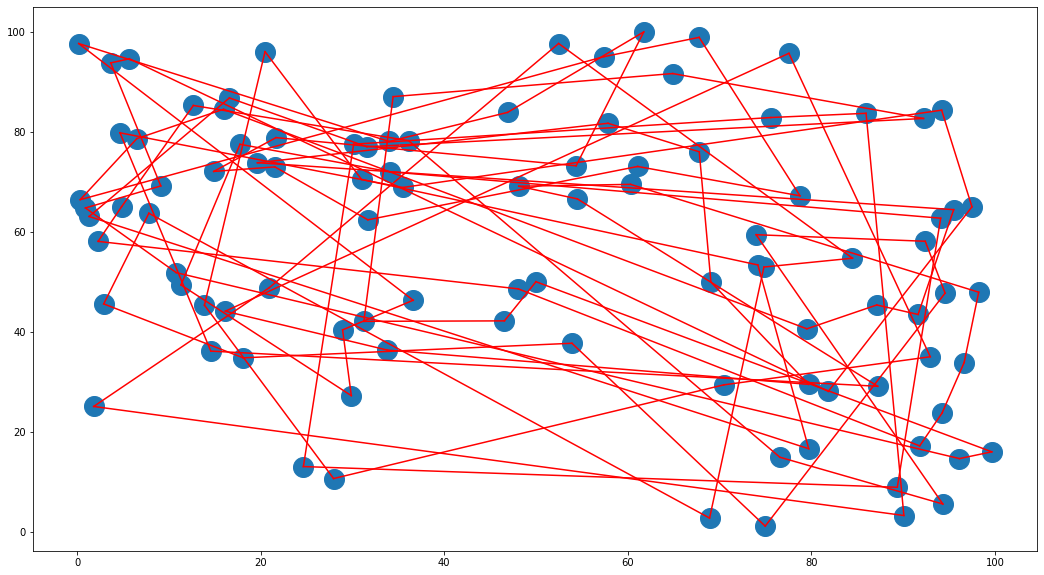

In [18]:
nb_iterations = 100
iter_max=100
taille_tabou=100

start = time.process_time()
val_min = 0
for i in routes:
    val_min += sum(i)
for _ in range(nb_iterations):
    tournee = randomSolution()
    sol_courante, courants, meilleurs_courants=recherche_tabou_graph(tournee, taille_tabou, iter_max)
    val_courante = distanceTournee(sol_courante)
    if (val_courante < val_min):
        val_min = val_courante
        sol_min = sol_courante
stop = time.process_time()
print("calculé en ", stop-start, 's')
print("\nTournée finale =" )
print(sol_min)
print('\n')
print("Distance=%d"% val_min)
printTournee(villes, sol_min)

## Algorithme génétique

In [19]:
def meilleur_solution(population, villes, best=None):
    for cities in population:
        dist = distanceTournee(cities)
        if best == None or dist < distanceTournee(best):
            best = cities
    return best

In [20]:
def doublons(L1,L2):
    Sm1 = L1.copy()
    Sm2 = L2.copy()
    for item in Sm1[:int((len(Sm1)/2))]:
        if item in Sm2:
            Sm2.remove(item)
    S = Sm1[:int((len(Sm1)/2))] + Sm2
    return S

In [21]:
#Calculate all values for a population of solution, get the best out of the population.
#Genetic algorithm
def AlgoGen(Solution_initiale, villes):
    #Initialize
    population = [randomSolution() for i in range(0, 150)]
    bestresult = meilleur_solution(population, villes)
    for gen in range(0, 199):
        nextGen = []
        it = len(population)
        for j in range(0, it, 2):
            #Selection
            Sm1 = population.pop(random.randint(0, len(population) - 1))
            Sm2 = population.pop(random.randint(0, len(population) - 1))
            #Crossover
            Sf1 = doublons(Sm1, Sm2)
            Sf2 = doublons(Sm2, Sm1)
            nextGen.append(Sf1)
            nextGen.append(Sf2)
        #Mutation
        for item in nextGen:
            #If the mutation happens (1% of the time), switch randomly two parts of the solution
            if random.random() > 0.99:
                rint1 = random.randint(0, len(item)-1)
                rint2 = random.randint(0, len(item)-1)
                temp = item[rint1]
                item[rint1] = item[rint2]
                item[rint2] = temp
        population = nextGen
        bestresult = meilleur_solution(population, villes, bestresult)
    return bestresult

calculé en  3.15625 s

Tournée finale =
[0, 43, 36, 61, 34, 2, 52, 88, 42, 85, 14, 20, 18, 35, 79, 31, 10, 39, 12, 29, 96, 37, 71, 6, 62, 5, 4, 44, 32, 80, 63, 77, 64, 47, 49, 60, 94, 89, 24, 70, 99, 21, 51, 17, 86, 91, 25, 59, 26, 46, 15, 75, 74, 57, 48, 23, 97, 56, 53, 33, 38, 28, 90, 73, 87, 27, 40, 9, 1, 83, 81, 72, 58, 55, 7, 95, 66, 76, 8, 22, 78, 68, 45, 67, 11, 50, 54, 84, 98, 30, 69, 3, 13, 19, 41, 92, 82, 16, 65, 93, 0]


Distance=4300


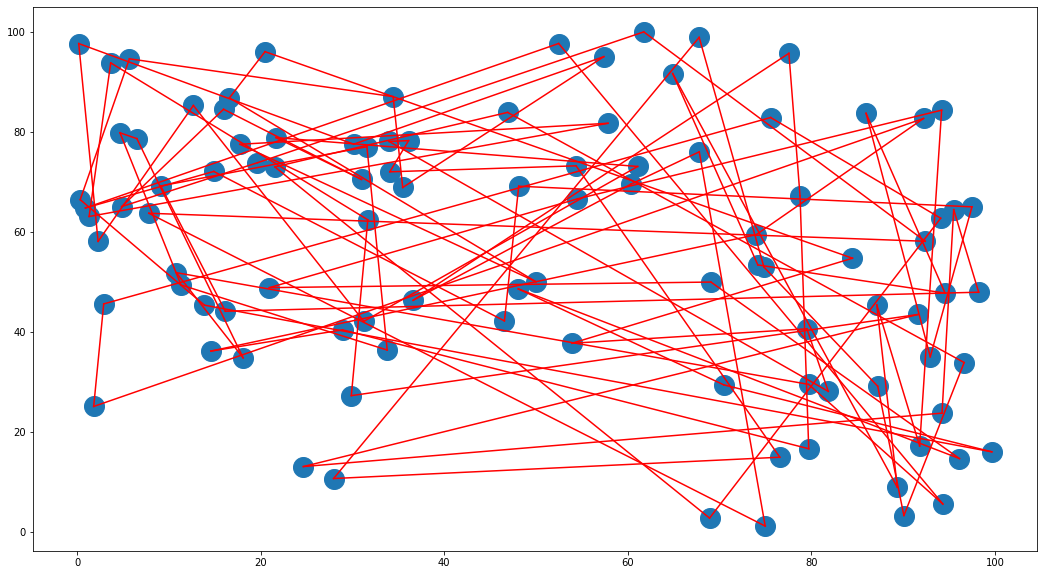

In [22]:

start = time.process_time()
Solution_initiale = randomSolution()
Solution= AlgoGen(Solution_initiale, villes)
stop = time.process_time()
print("calculé en ", stop-start, 's')
print("\nTournée finale =" )
print(Solution)
print('\n')
print("Distance=%d"% distanceTournee(Solution))
printTournee(villes, Solution)